$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 0** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability, Ipython Primer**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Mikael** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/3** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: ** <br />
$\qquad$ $\qquad$$\qquad$$\qquad$ Adam Tonderski, 930524-1037, tadam@student.chalmers.se <br />
$\qquad$ $\qquad$$\qquad$$\qquad$ Britta Thornblom, 900718-1341, brittat@student.chalmers.se <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments except for Neural Network assignment which is be based on matlab. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://research.google.com/colaboratory/faq.html 
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# Theoretical problems

## [Bayes Rule, 5 points]

After your yearly checkup, the doctor has bad news and good news. The
bad news is that you tested positive for a very serious cancer and
that the test is 99% accurate i.e. the probability of testing
positive given you have the disease is 0.99. The probability of
testing negative if you don’t have the disease is the same. The good news is that it is a very rare condition affecting only 1 in 10,000 people. What is the probability you actually have the disease? (Show all calculations and the final result.)

### Answer
Denoting P(A): probability of carrying the disease, P(B): probability of testing positive for the disease, P(A|B): probability of carrying the disease if testing positive for it. Furthermore, we denote the latter's reciprocal P(B|A): probability of testing positive if one is carrying the disease. We want to use these in Bayes Theorem:

\begin{equation}
P(A|B) = \frac{P(A)P(B|A)}{P(B)}
\end{equation}

but we only have values for two of the three variables in the right hand side of this equation: $P(A) = 1/10000 = 0.0001$ and $P(B|A) = 0.99$. The former comes from the population statistics of the disease and the latter is the accuracy of the test for true positives. But we still need a value for $P(B)$. We can get it by summing up all the different ways of B occuring. B can happen through to ways, A occuring or A not occuring (the complement of A, denoted $A'$), both with their respective probability. In mathematical terms:

\begin{equation}
P(B) = P(B|A)P(A) + P(B|A')P(A')
\end{equation}

P(B|A) we know to be 0.99. P(A) is still 0.0001. P(B|A') is the probability of a false postive, given implicitly in the problem statement as 1 - 0.99 = 0.01. Finally P(A') is the prior probability of not carrying the disease and it's value is 1 - 1/10000 = 0.9999. Plugging these values into the equation for P(B), we get:

\begin{equation}
P(B) = 0.99\cdot0.0001 + 0.1 \cdot0.9999 \approx 0.01
\end{equation}

Using this in Bayes Theorem (first equation in this section, sorry about the equation numbering not working) we get a value for $P(A|B) \approx 0.0098$, or in words just shy of 1% risk of having the disease given a positive test.

## [Correlation and Independence, 5 points]

Let $X$ be a continuous variable, uniformly distributed in $[-1, +1]$ and let $Y := X^2$. Clearly $Y$ is not independent of $X$ -- in fact it is uniquely determined by $X$. However, show that $\mbox{cov}(X, Y ) = 0$.

### Answer
For a uniformly distributed stochastic variable on an interval [a, b], the epected value is equal to $(a+b)/2$, so we get $E[X] = (1+(-1))/2 = 0$. Since $Y$ is determined by $X$, we can simplify the sought-after value $\mbox{cov}(X, Y )$ as $\mbox{cov}(X, X ^2 )$. We use the definition of the covariance $\mbox{cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$. We combine these two expressions to get:

$$ \mbox{cov}(X, X^2 ) = E[(X - E[X])(X^2 - E[X^2])] $$

We cross multiply the two parenthesis to get:

$$ \mbox{cov}(X, X^2 ) = E[(X\cdot X^2 - - X E[X^2] - X^2 E[X] + E[X]E[X^2])]$$

Inserting $E[X] = 0$ removes some of the terms:

$$ \mbox{cov}(X, X^2 ) = E[(X^3 - X E[X^2])]$$

Now we can use the linear property of the expected value to get:

$$ \mbox{cov}(X, X^2 ) = E[X^3] - E[X E[X^2]]$$
$$ \mbox{cov}(X, X^2 ) = E[X^3] - E[X]*E[X^2]$$

And again we use the fact that $E[X] = 0$ to get

$$ \mbox{cov}(X, X^2 ) = E[X^3]$$

X^3 is an odd function and integrating an odd function on a symmetric interval results in 0. This means that:

$$ \mbox{cov}(X, Y) = 0$$

## [Setting hyperparameters, 3 points]

Suppose $\theta \sim \mbox{Beta}(a,b)$ and we believe $E[\theta] = m$
and $\mbox{var}(\theta) = v$. How should the parameters $a$ and $b$ be
set to be consistent with this? Confirm that this gives the same values claimed in the lecture.

### Answer
For a Beta distributed variable $\theta \sim \mbox{Beta}(a,b)$ the expected value is:

$$ E[\theta] =  \frac{1}{1 + \frac{b}{a}} $$

To get $E[\theta] = m$, we set

$$ m = \frac{a}{a+b} \Rightarrow a+b = \frac{a}{m} \Rightarrow b = \frac{a}{m} - a $$

The variance is defined as:

$$ Var[\theta] = \frac{a b}{(a + b)^2 (a + b +1)} $$

We plug in the expression for $a+b$ form above and get: 

$$ v = \frac{a b}{\left(\frac{a}{m} \right)^2 \left(\frac{a}{m}+1\right)} $$

$$ \frac{a ^2}{m^2} \left(\frac{a}{m}+1\right) = \frac{a b}{v} $$

$$ \frac{a^3}{m^3} + \frac{a^2}{m^2}= \frac{a b}{v} $$

In the next step we can safely assume that $a \not = 0$ since the beta distribution is only defined for $a, b > 0$:

$$ \frac{a^2}{m^3} + \frac{a}{m^2}= \frac{b}{v} $$

Isolating b:

$$ v \left(\frac{a^2}{m^3} + \frac{a}{m^2}\right)= b = \frac{a}{m} - a$$

Removing redundant factors of a with the same argument as before yields:

$$ v \left(\frac{a}{m^3} + \frac{1}{m^2}\right)= \frac{1}{m} - 1$$

Simplifying and isolating a:

$$ v \left(\frac{a}{m^3} \right) = \frac{1}{m} - 1 - v \left(\frac{1}{m^2}\right)$$
$$ a \left(\frac{v}{m^3} \right) = \frac{m-m^2-v}{m^2} $$
$$ a  = \frac{m^3}{v} \frac{m-m^2-v}{m^2} $$
$$ a  = \frac{m}{v} (m-m^2-v) $$
$$ a  = \frac{m^2-m^3-vm}{v} $$

Now we use the expression from before to get b:

$$ b = \frac{a}{m} - a $$
$$ b = \frac{\frac{m^2-m^3-vm}{v}}{m} - \frac{m^2-m^3-vm}{v} $$
$$ b = \frac{m^2-m^3-vm}{vm} - \frac{m^2-m^3-vm}{v} $$
$$ b = \frac{m-m^2-v}{v} - \frac{m^2-m^3-vm}{v} $$
$$ b = \frac{m-m^2-v-m^2+m^3+vm}{v} $$
$$ b = \frac{m-2m^2-v+m^3+vm}{v} $$
$$ b = \frac{m^3 -2m^2 + (1+ v)m -v}{v} $$


In [1]:

# Bayes Rule
P_A = 0.0001
P_B_A = 0.99

P_B_A_ = 1 - P_B_A
P_A_ = 1 - P_A

P_B = P_B_A*P_A + P_B_A_*P_A_
print("P_B: " + str(P_B))

P_A_B = (P_A*P_B_A)/P_B

print("P_A_B: " + str(P_A_B))

P_B: 0.01009800000000001
P_A_B: 0.009803921568627442


# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

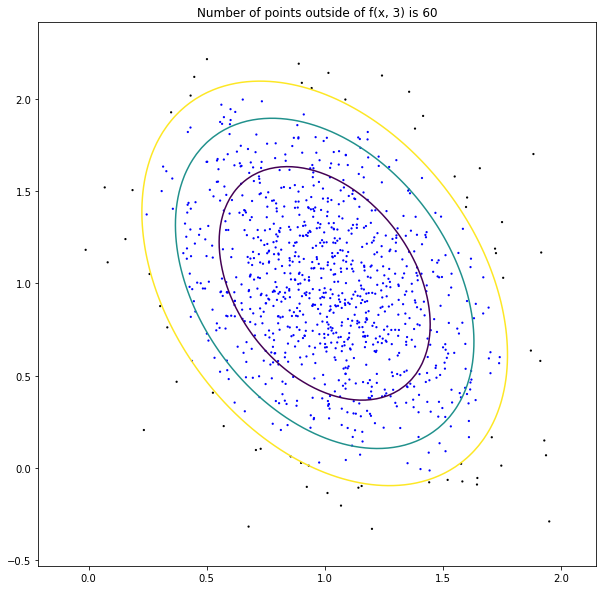

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu = [1, 1]
sigma = [[0.1, -0.05], [-0.05, 0.2]]
a = 0.1
b = -0.05
c = -0.05
d = 0.2

sigma_inv = np.linalg.inv(sigma)

hej = np.random.multivariate_normal(mu, sigma, 1000)
hejhej = np.transpose(hej)
x = hejhej[0]
y = hejhej[1]

def newF(x,y):
    diff = np.array([x,y]) - mu
    return diff.dot(sigma_inv).dot(diff.T)/2
    
vectorF = np.vectorize(newF)
z = vectorF(x,y)

# Make these depend on the generated values

margin = 0.2
y_min = np.amin(y) - margin
y_max = np.amax(y) + margin
x_min = np.amin(x) - margin
x_max = np.amax(x) + margin

X_, Y_ = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z_ = vectorF(X_,Y_)

counter = np.sum(z>3)

plt.figure(figsize=(10,10))
plt.contour(X_, Y_, Z_, levels=[1, 2, 3])
col = np.where(z < 3, 'b', 'k')
plt.scatter(x, y, c=col, s=5, linewidth=0)
plt.title("Number of points outside of f(x, 3) is %d" % (counter))
plt.show()

## [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

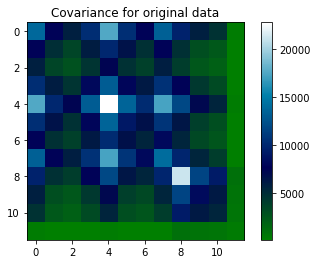

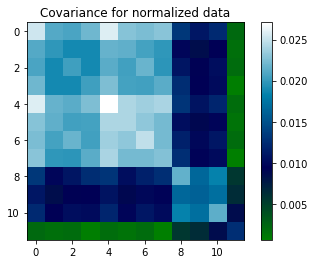

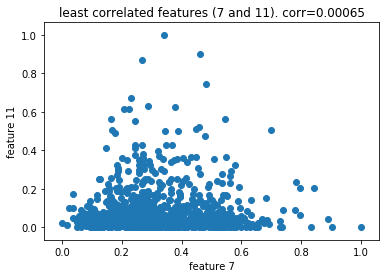

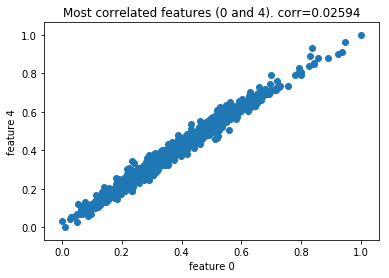

In [5]:
import matplotlib.pyplot as plt
import numpy as np

K = 12
N = 1074
fname = "dataset0.txt"
data = np.loadtxt(fname)
max_values = np.max(data, axis=0)
min_values = np.min(data, axis=0)
normalized_data = (data - min_values)/(max_values - min_values)

cov_mat = np.cov(data.T)
normalized_cov_mat = np.cov(normalized_data.T)

shape = normalized_cov_mat.shape

min_index = np.unravel_index(np.argmin(normalized_cov_mat), shape)
# subtract identity matrix since we want to most correlated DIFFERENT features
max_index = np.unravel_index(np.argmax(normalized_cov_mat - np.identity(K)), shape)

plt.imshow(cov_mat, cmap=plt.cm.ocean)
plt.colorbar()
plt.title("Covariance for original data")

plt.figure()
plt.imshow(normalized_cov_mat, cmap=plt.cm.ocean)
plt.colorbar()
plt.title("Covariance for normalized data")

plt.figure()
plt.scatter(normalized_data[:,min_index[0]], normalized_data[:,min_index[1]])
plt.xlabel("feature %d" % min_index[0])
plt.ylabel("feature %d" % min_index[1])
plt.title("least correlated features (%d and %d). corr=%.5f" % (min_index[0], min_index[1], normalized_cov_mat[min_index]))

plt.figure()
plt.scatter(normalized_data[:,max_index[0]], normalized_data[:,max_index[1]])
plt.xlabel("feature %d" % max_index[0])
plt.ylabel("feature %d" % max_index[1])
plt.title("Most correlated features (%d and %d). corr=%.5f" % (max_index[0], max_index[1], normalized_cov_mat[max_index]))

plt.show()

We can see clear differences between the colormaps representing the covariances of the original and normalized dataset. The normalized case shows much more structure, indicating groups of features which are more correlated to each other.

The reason why it's beneficial to normalize the data can be easily shown by a thought experiment where we have 2 features. One represents a value that is bound between 0 and 1 (say a percentage) and the other represents some value that varies between 10000 and 11000. Without rescaling, any slight variation in the second feature will greatly overshadow even a massive change in the first feature.

Next we made two scatter plots, one for the 2 least correlated features and one for the 2 most correlated (distinct) features. We can clearly see that that the highly correlated features resemble a straight line, whereas the non-correlated features are quite randomly distributed, without a very clear pattern (other than being close to the x axis). This kind of result is what we would expect since the covariance matrix expresses the apparent coupling of 2 features.